# Computo paralelo

In [1]:
import numpy as np
import pandas as pd
import ray # Ray es una librería que nos permite ejecutar código en paralelo 
import time 
from datetime import datetime

In [9]:
%%time
ray.init() # Inicializar ray


@ray.remote 
def funcion(x):
    return x**2

resultado = [funcion.remote(i) for i in range(4)]
print(ray.get(resultado))

ray.shutdown() #terminar ray

2020-07-30 11:47:23,601	INFO resource_spec.py:212 -- Starting Ray with 2.0 GiB memory available for workers and up to 1.01 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-30 11:47:23,886	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-30 11:47:24,053	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


[0, 1, 4, 9]
CPU times: user 718 ms, sys: 351 ms, total: 1.07 s
Wall time: 12.2 s


In [8]:
%%time
def funcion2(x):
    return x**2

resultado = [funcion2(i) for i in range(4)]
print(resultado)

[0, 1, 4, 9]
CPU times: user 247 µs, sys: 113 µs, total: 360 µs
Wall time: 265 µs


In [12]:
def funcion2(x):
    time.sleep(2)
    return x
resultado = []

print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))

for i in range(4):
    resultado.append(funcion2(i))
    
print("final: ", datetime.now().strftime("%H:%M:%S.%f"))
print(resultado)

inicio:  11:53:38.560729
final:  11:53:46.579022
[0, 1, 2, 3]


In [15]:
ray.init()

@ray.remote
def funcion(x):
    time.sleep(2)
    return x

resultado = []

print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))

for i in range(50):
    resultado.append(funcion.remote(i))
    print(datetime.now().strftime("%H:%M:%S.%f"))
res = ray.get(resultado)
print("final: ", datetime.now().strftime("%H:%M:%S.%f"))
print(res)
ray.shutdown()

2020-07-30 11:56:54,682	INFO resource_spec.py:212 -- Starting Ray with 2.1 GiB memory available for workers and up to 1.07 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-30 11:56:54,995	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-30 11:56:55,213	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


inicio:  11:56:56.500088
11:56:56.519545
11:56:56.522531
11:56:56.525374
11:56:56.532893
11:56:56.537897
11:56:56.540511
11:56:56.542655
11:56:56.544882
11:56:56.548906
11:56:56.551773
11:56:56.553972
11:56:56.556361
11:56:56.558660
11:56:56.561390
11:56:56.565354
11:56:56.569321
11:56:56.573273
11:56:56.575765
11:56:56.579459
11:56:56.581601
11:56:56.584806
11:56:56.587113
11:56:56.589008
11:56:56.591817
11:56:56.593878
11:56:56.597312
11:56:56.599557
11:56:56.601783
11:56:56.603865
11:56:56.605696
11:56:56.608986
11:56:56.612824
11:56:56.634134
11:56:56.636858
11:56:56.637869
11:56:56.641271
11:56:56.642497
11:56:56.643201
11:56:56.649582
11:56:56.651323
11:56:56.652104
11:56:56.655129
11:56:56.656405
11:56:56.659034
11:56:56.663815
11:56:56.667120
11:56:56.670625
11:56:56.674168
11:56:56.678979
11:56:56.682348


2020-07-30 11:57:05,746	WARNING worker.py:1047 -- The actor or task with ID 71e6fe678049eeedffffffff0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {memory: 2.099609 GiB}, {CPU: 8.000000}, {object_store_memory: 0.732422 GiB}, {node:192.168.2.134: 1.000000}. In total there are 1 pending tasks and 0 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2020-07-30 11:57:06,732	INFO (unknown file):0 -- gc.collect() freed 4476 refs in 0.8918948749997071 seconds


final:  11:57:20.929285
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


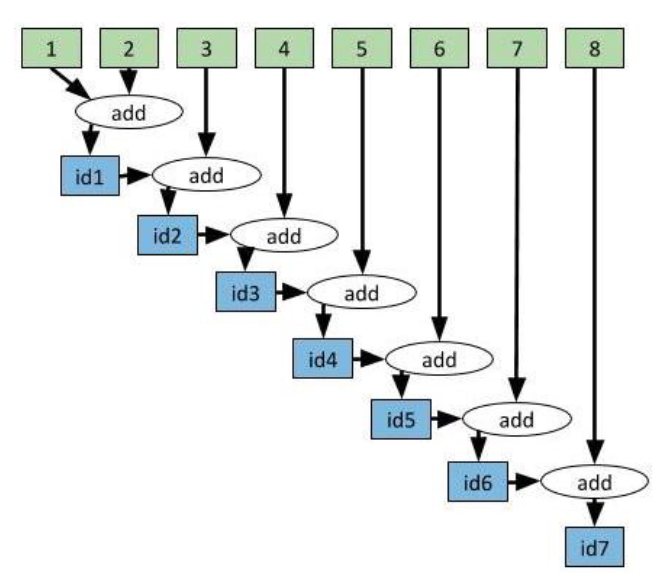

In [16]:
ray.init()

@ray.remote 
def suma(x,y):
    time.sleep(1)
    return x + y

print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
val1 = suma.remote(1,2)
val2 = suma.remote(val1,3)
val3 = suma.remote(val2,4)
val4 = suma.remote(val3,5)
val5 = suma.remote(val4,6)
val6 = suma.remote(val5,7)
val7 = suma.remote(val6,8)
resultado = ray.get(val7)
print("final: ", datetime.now().strftime("%H:%M:%S.%f"))

ray.shutdown()



2020-07-30 12:02:10,913	INFO resource_spec.py:212 -- Starting Ray with 2.25 GiB memory available for workers and up to 1.15 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-30 12:02:11,235	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-30 12:02:11,423	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


inicio:  12:02:12.655225


2020-07-30 12:02:21,885	WARNING worker.py:1047 -- The actor or task with ID ca13d299a99894fbffffffff0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {memory: 2.246094 GiB}, {CPU: 8.000000}, {object_store_memory: 0.781250 GiB}, {node:192.168.2.134: 1.000000}. In total there are 1 pending tasks and 0 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.


final:  12:02:29.810619


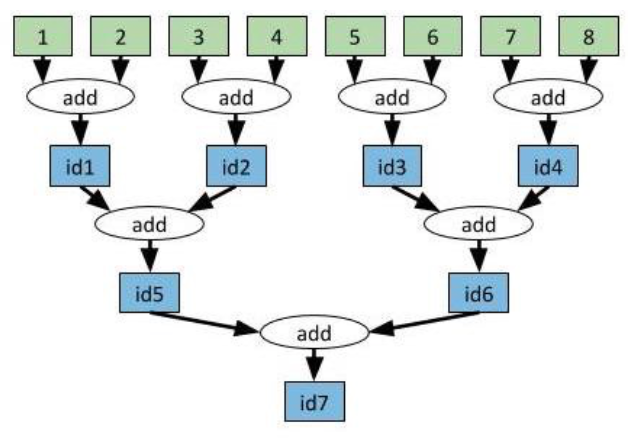

In [17]:
ray.init()

@ray.remote 
def suma(x,y):
    time.sleep(1)
    return x + y

print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
val1 = suma.remote(1,2)
val2 = suma.remote(3,4)
val3 = suma.remote(5,6)
val4 = suma.remote(7,8)
val5 = suma.remote(val1,val2)
val6 = suma.remote(val3,val4)
val7 = suma.remote(val5,val6)
resultado = ray.get(val7)
print("final: ", datetime.now().strftime("%H:%M:%S.%f"))

ray.shutdown()



2020-07-30 12:03:47,038	INFO resource_spec.py:212 -- Starting Ray with 2.2 GiB memory available for workers and up to 1.1 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-30 12:03:47,315	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-30 12:03:47,531	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


inicio:  12:03:48.777376


2020-07-30 12:03:57,894	WARNING worker.py:1047 -- The actor or task with ID e5657bcb0d8cc5e4ffffffff0100 is pending and cannot currently be scheduled. It requires {CPU: 1.000000} for execution and {CPU: 1.000000} for placement, but this node only has remaining {memory: 2.197266 GiB}, {CPU: 8.000000}, {object_store_memory: 0.732422 GiB}, {node:192.168.2.134: 1.000000}. In total there are 1 pending tasks and 0 pending actors on this node. This is likely due to all cluster resources being claimed by actors. To resolve the issue, consider creating fewer actors or increase the resources available to this Ray cluster. You can ignore this message if this Ray cluster is expected to auto-scale.
2020-07-30 12:03:58,665	INFO (unknown file):0 -- gc.collect() freed 11 refs in 0.6731948350002313 seconds


final:  12:04:02.511403


In [ ]:
def funcion(x,y):
    return (x*y)**x*(y**x)


print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
lista=[]
for i in range(1000,4000):
    res = funcion(i,i+1)
    lista.append(res)
print("fin: ", datetime.now().strftime("%H:%M:%S.%f"))
len(lista)


In [ ]:

ray.init()

@ray.remote
def funcion(x,y):
    return (x*y)**x*(y**x)


print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
lista=[]
for i in range(1000,4000):
    res = funcion.remote(i,i+1)
    lista.append(res)
print("fin: ", datetime.now().strftime("%H:%M:%S.%f"))
len(lista)

ray.shutdown()

In [ ]:
ray.init()

@ray.remote
def funcion(x,y):
    return (x*y)**x*(y**x)


print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
lista=[]
for i in range(1000,4000):
    res = funcion.remote(i,i+1)
    lista.append(res)
print("fin: ", datetime.now().strftime("%H:%M:%S.%f"))
len(lista)

ray.shutdown()

In [18]:
from sklearn import datasets
data,target  = datasets.fetch_kddcup99("data",return_X_y=True)

In [20]:
data.shape

array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
       ...,
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
       [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object)

In [21]:
df  = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,9,1,0,0.11,0,0,0,0,0
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,19,1,0,0.05,0,0,0,0,0
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,29,1,0,0.03,0,0,0,0,0
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,39,1,0,0.03,0,0,0,0,0
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,49,1,0,0.02,0,0,0,0,0


In [22]:
def dist_euc(P1,P2):
    dist = np.sqrt(np.sum((P2-P1)**2))
    return dist

In [27]:
p1 = df[range(35,40)].iloc[0]
m=[]
print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
for i in range(1,1000):
    p2 = df[range(35,40)].iloc[i].values
    dist = dist_euc(p1,p2)
    m.append(dist)
print("fin: ", datetime.now().strftime("%H:%M:%S.%f"))

inicio:  12:16:33.078904


KeyboardInterrupt: 

In [26]:
ray.init()

@ray.remote
def dist_euc2(P1,P2):
    dist = np.sqrt(np.sum((p2-p1)**2))
    return dist

m=[]
print("inicio: ", datetime.now().strftime("%H:%M:%S.%f"))
for i in range(1,1000):
    p2 = df[range(35,40)].iloc[i].values
    dist = dist_euc2.remote(p1,p2)
    m.append(dist)
print("fin: ", datetime.now().strftime("%H:%M:%S.%f"))

ray.shutdown()

2020-07-30 12:13:04,426	INFO resource_spec.py:212 -- Starting Ray with 2.29 GiB memory available for workers and up to 1.16 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-30 12:13:04,709	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-30 12:13:04,928	INFO services.py:1165 -- View the Ray dashboard at localhost:8265


inicio:  12:13:06.141375
fin:  12:16:29.974311


# Practica

1. Crea una función que multiplique todos los números de una lista dada. Ingresa el siguiente range(999,999999) a la función y que devuelva el resultado. Implementalo como se haría normalmente y después utilizando cómputo paralelo, calcula los tiempos de ejecución.

2. Crea una función que divida una lista en dos partes iguales, ordene las dos listas de mayor a menor, concatene las listas y devuelva una nueva lista. Implementalo como se haría normalmente y después utilizando cómputo paralelo, calcula los tiempos de ejecución.

3. Crea una función que encuentre contraseñas de 7 digitos entre el 0 y el 9 utilizando "fuerza bruta". Implementalo como se haría normalmente y después utilizando cómputo paralelo, calcula los tiempos de ejecución.

4. Repite el ejercicio anterior para encontrar una contraseña de 5 letras tomando en cuenta el alfabeto en minúsculas y sin símbolos. Implementalo solo en cómputo paralelo

5. ¿Como mejorarías el último ejemplo de la teoría para que encontra la distancía aún más rápido? ¡Implementa tu solución!

6. Elije uno de los algoritmos de ordenamiento de la siguiente página y https://www.tutorialspoint.com/python_data_structure/python_sorting_algorithms.htm, comenta su funcionamiento y mejora su tiempo de ejecución utilizando cómputo paralelo.